In [1]:
# Import Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\movies.csv\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Data Cleaning

In [6]:
# Let's see if their is any missing data

print("Columns with missing values: ")
print(df.isnull().any())



Columns with missing values: 
name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool


In [7]:
print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [8]:
df.rating.fillna("No rating", inplace=True)
df.company.fillna("No company", inplace=True)
df.gross.fillna("0", inplace=True)
df.budget.fillna("0", inplace=True)
df.dropna(subset=["runtime", "writer", "country", "votes", "score", "released", "star"], inplace=True)

In [9]:
print(df.isnull().any())

name        False
rating      False
genre       False
year        False
released    False
score       False
votes       False
director    False
writer      False
star        False
country     False
budget      False
gross       False
company     False
runtime     False
dtype: bool


In [10]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
# df.Year.fillna("0", inplace=True)

In [13]:
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [15]:
# Sorting columns by gross revenue in descending order

df.sort_values(by=['gross'], inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


## Exploratory Analysis and Visualization

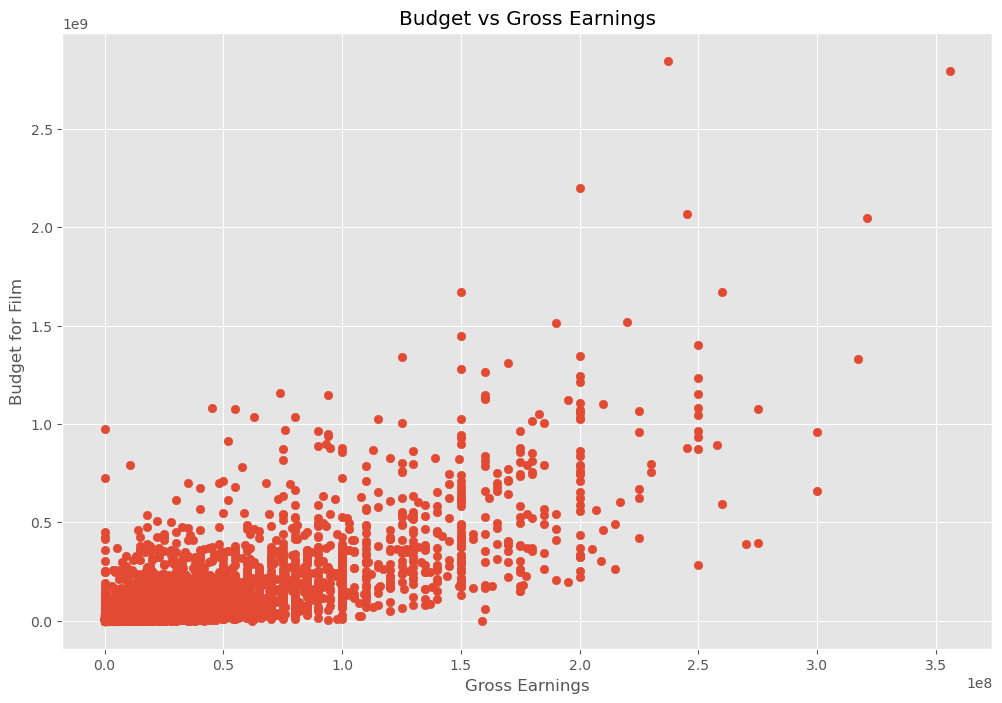

In [16]:
# Scatter plot between Budget & Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

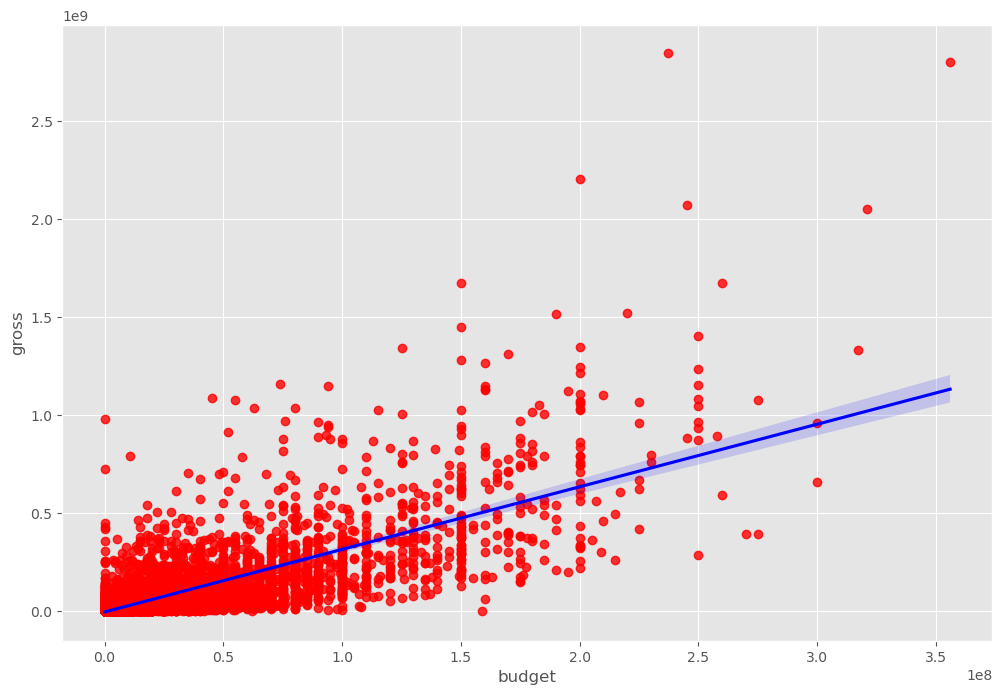

In [17]:
# Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

Correlation Matrix between all numeric columns

In [18]:
df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099012,0.223453,0.310653,0.262716,0.120572
score,0.099012,1.000000,0.409496,0.055778,0.186447,0.400459
votes,0.223453,0.409496,1.000000,0.486793,0.632924,0.309123
budget,0.310653,0.055778,0.486793,1.000000,0.750254,0.269439
gross,0.262716,0.186447,0.632924,0.750254,1.000000,0.245191
runtime,0.120572,0.400459,0.309123,0.269439,0.245191,1.000000


In [19]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.068424,0.332290,0.210637,0.218174,0.097016
score,0.068424,1.000000,0.300825,-0.005203,0.090564,0.283888
votes,0.332290,0.300825,1.000000,0.440115,0.560625,0.197876
budget,0.210637,-0.005203,0.440115,1.000000,0.542191,0.176160
gross,0.218174,0.090564,0.560625,0.542191,1.000000,0.176677
runtime,0.097016,0.283888,0.197876,0.176160,0.176677,1.000000


In [20]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.100178,0.471175,0.293081,0.317214,0.142758
score,0.100178,1.000000,0.429153,-0.007505,0.132484,0.400296
votes,0.471175,0.429153,1.000000,0.604891,0.753192,0.289674
budget,0.293081,-0.007505,0.604891,1.000000,0.717098,0.246935
gross,0.317214,0.132484,0.753192,0.717098,1.000000,0.256484
runtime,0.142758,0.400296,0.289674,0.246935,0.256484,1.000000


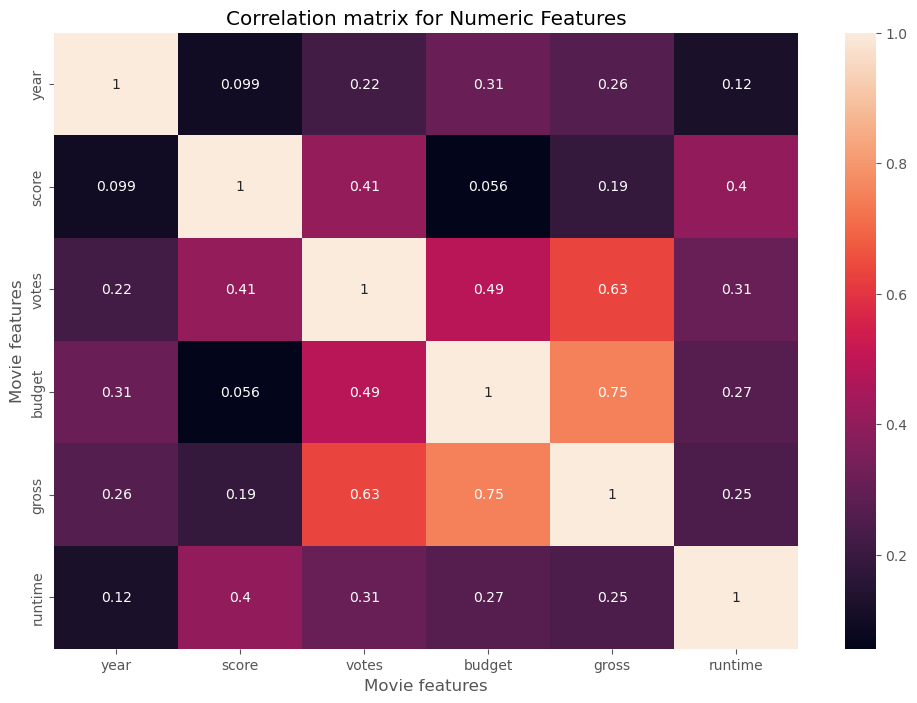

In [21]:
# Heatmap of correlation matrix
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [22]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6577,7,6,1980,1701,8.4,927000,2585,4008,1043,54,19000000,46998772,2313,146
1,5566,7,1,1980,1488,5.8,65000,2266,1630,325,55,4500000,58853106,727,104
2,5135,5,0,1980,1767,8.7,1200000,1111,2564,1741,55,18000000,538375067,1533,124
3,286,5,4,1980,1488,7.7,221000,1300,1997,2240,55,3500000,83453539,1806,88
4,1027,7,4,1980,1539,7.3,108000,1054,520,408,55,6000000,39846344,1771,98
5,2108,7,9,1980,2498,6.4,123000,2524,4355,240,55,550000,39754601,1806,95
6,5567,7,0,1980,1767,7.9,188000,1411,836,1273,55,27000000,115229890,2275,133
7,4431,7,3,1980,696,8.2,330000,1827,1767,2234,55,18000000,23402427,627,129
8,5274,5,0,1980,1749,6.8,101000,2302,1976,874,55,54000000,108185706,879,127
9,6204,7,3,1980,2282,7.0,10000,2858,422,586,55,10000000,15795189,2266,100


In [23]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011202,0.014866,0.011448,-0.010253,0.016921,0.013214,0.009271,0.009960,0.006279,-0.010447,0.020981,0.007335,0.010536,0.010751
rating,-0.011202,1.000000,0.094557,0.023654,0.017745,0.001454,0.023765,0.020191,-0.005473,0.007095,0.060688,-0.103387,-0.112673,-0.058191,0.074700
genre,0.014866,0.094557,1.000000,-0.083817,0.030434,0.039608,-0.150220,-0.016137,0.005632,-0.004790,-0.037510,-0.342492,-0.241471,-0.072568,-0.044900
year,0.011448,0.023654,-0.083817,1.000000,-0.001070,0.099012,0.223453,-0.021091,-0.007510,-0.026888,-0.070225,0.310653,0.262716,-0.011015,0.120572
released,-0.010253,0.017745,0.030434,-0.001070,1.000000,0.042626,0.015881,-0.001397,-0.002391,0.016726,-0.021784,0.008838,0.000080,-0.009657,0.000328
score,0.016921,0.001454,0.039608,0.099012,0.042626,1.000000,0.409496,0.009224,0.019470,-0.001244,-0.133796,0.055778,0.186447,-0.002751,0.400459
votes,0.013214,0.023765,-0.150220,0.223453,0.015881,0.409496,1.000000,0.000542,0.000801,-0.019333,0.073399,0.486793,0.632924,0.131206,0.309123
director,0.009271,0.020191,-0.016137,-0.021091,-0.001397,0.009224,0.000542,1.000000,0.299175,0.039676,0.019031,0.005190,-0.015034,0.004923,0.018167
writer,0.009960,-0.005473,0.005632,-0.007510,-0.002391,0.019470,0.000801,0.299175,1.000000,0.027599,0.015554,-0.026627,-0.023075,0.003476,-0.002951
star,0.006279,0.007095,-0.004790,-0.026888,0.016726,-0.001244,-0.019333,0.039676,0.027599,1.000000,-0.014707,-0.020153,-0.001155,0.009828,0.009193


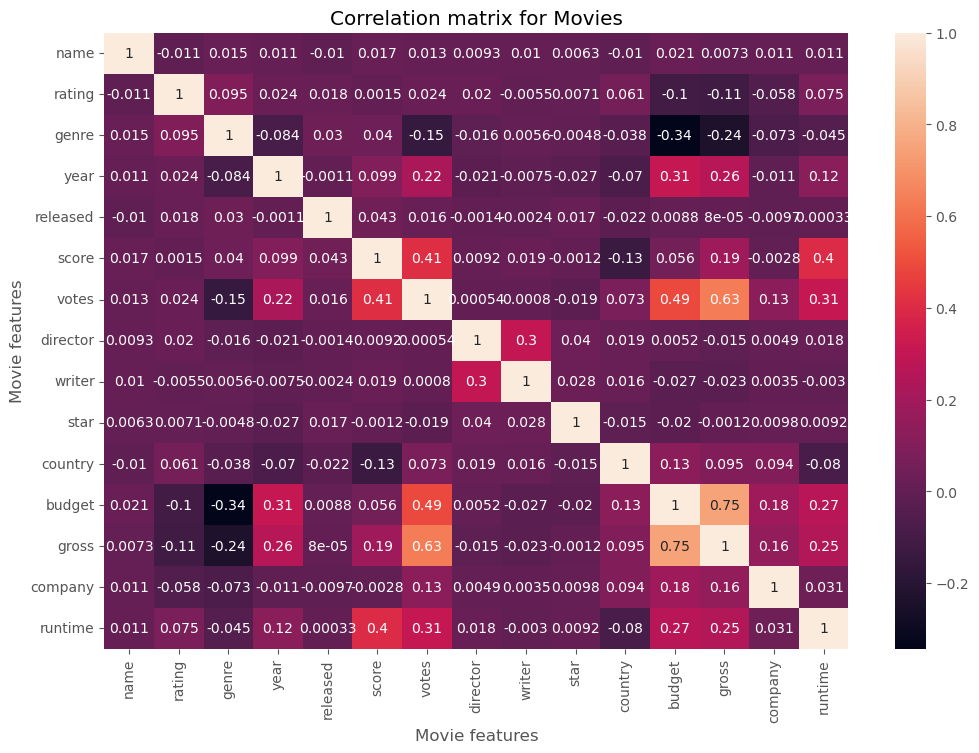

In [24]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
correlation_pair = df_numerized.corr().unstack()
correlation_pair.head(20)

name    name        1.000000
        rating     -0.011202
        genre       0.014866
        year        0.011448
        released   -0.010253
        score       0.016921
        votes       0.013214
        director    0.009271
        writer      0.009960
        star        0.006279
        country    -0.010447
        budget      0.020981
        gross       0.007335
        company     0.010536
        runtime     0.010751
rating  name       -0.011202
        rating      1.000000
        genre       0.094557
        year        0.023654
        released    0.017745
dtype: float64

In [26]:
sorted_pairs = correlation_pair.sort_values()
sorted_pairs.head(10)

budget   genre     -0.342492
genre    budget    -0.342492
gross    genre     -0.241471
genre    gross     -0.241471
votes    genre     -0.150220
genre    votes     -0.150220
score    country   -0.133796
country  score     -0.133796
gross    rating    -0.112673
rating   gross     -0.112673
dtype: float64

In [27]:
high_corr = sorted_pairs[(sorted_pairs)>=0.5] 
high_corr

votes     gross       0.632924
gross     votes       0.632924
          budget      0.750254
budget    gross       0.750254
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Votes and Budget have the highest correlation to gross earnings

In [32]:
# Looking at the top 15 companies by gross revenue
print("Top 15 companies by gross revenue:")

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted

Top 15 companies by gross revenue:


,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [29]:
# Highest grossing movie till date

df1 = df.sort_values(by=['gross'], inplace=False, ascending=False)
df1[['name','year', 'director','gross', 'budget','company']].head(1).reset_index(drop=True).T

,0
name,Avatar
year,2009
director,James Cameron
gross,2847246203
budget,237000000
company,Twentieth Century Fox


In [30]:
# Top 10 Highest grossing movies
df1[['name','year', 'director','gross', 'budget','company']].head(10).reset_index(drop=True)

,name,year,director,gross,budget,company
0,Avatar,2009,James Cameron,2847246203,237000000,Twentieth Century Fox
1,Avengers: Endgame,2019,Anthony Russo,2797501328,356000000,Marvel Studios
2,Titanic,1997,James Cameron,2201647264,200000000,Twentieth Century Fox
3,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,2069521700,245000000,Lucasfilm
4,Avengers: Infinity War,2018,Anthony Russo,2048359754,321000000,Marvel Studios
5,The Lion King,2019,Jon Favreau,1670727580,260000000,Walt Disney Pictures
6,Jurassic World,2015,Colin Trevorrow,1670516444,150000000,Universal Pictures
7,The Avengers,2012,Joss Whedon,1518815515,220000000,Marvel Studios
8,Furious 7,2015,James Wan,1515341399,190000000,Universal Pictures
9,Frozen II,2019,Chris Buck,1450026933,150000000,Walt Disney Animation Studios
